In [ ]:
import pandas as pd
import numpy as np


num_days = 3000

dates = pd.date_range(start="2010-01-01", periods=num_days, freq='D')

base_production = 1500
trend = np.arange(num_days) * 0.05
seasonal = 100 * np.sin(2 * np.pi * np.arange(num_days)/365)
np.random.seed(42)
noise = np.random.randint(-50, 50, size=num_days)


production = base_production + trend + seasonal + noise


df = pd.DataFrame({
    "date": dates,
    "production": production.astype(int)
})


df.to_csv("better_oil_production.csv", index=False)


df.head()


,date,production
0,2010-01-01,1501
1,2010-01-02,1543
2,2010-01-03,1467
3,2010-01-04,1526
4,2010-01-05,1517


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

df = pd.read_csv("better_oil_production.csv")

df.head()

print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())


Shape: (3000, 2)
Missing values:
 date          0
production    0
dtype: int64


In [ ]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Extract year, month, day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Create lag features (past 3 days)
df['lag1'] = df['production'].shift(1)
df['lag2'] = df['production'].shift(2)
df['lag3'] = df['production'].shift(3)

# Drop rows with NaN
df = df.dropna()

# Define features and target
X = df[['year','month','day','lag1','lag2','lag3']]
y = df['production']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (2397, 6)
Test shape: (600, 6)


In [ ]:
# Import model and metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", round(mae,2))
print("R²:", round(r2,2))

MAE: 28.31
R²: 0.81


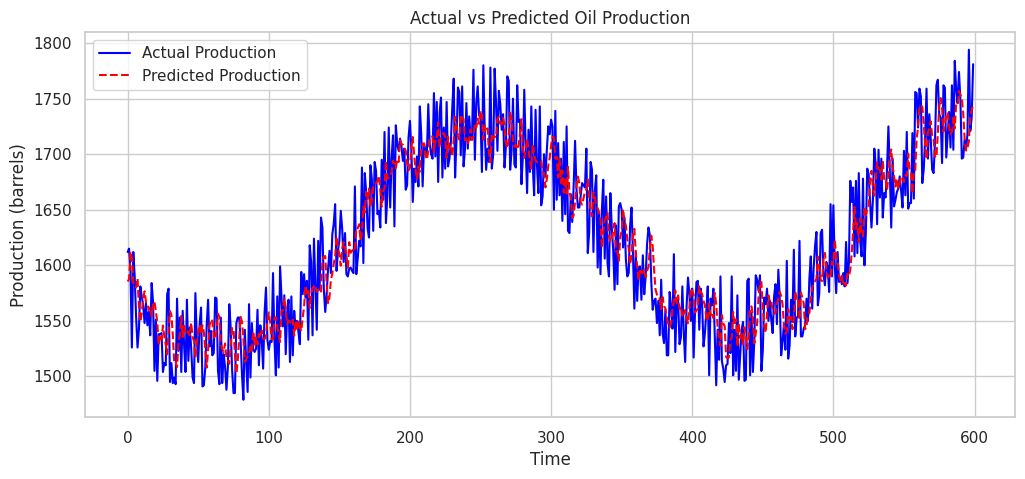

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual Production', color='blue')
plt.plot(y_pred, label='Predicted Production', color='red', linestyle='--')
plt.title("Actual vs Predicted Oil Production")
plt.xlabel("Time")
plt.ylabel("Production (barrels)")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
accuracy = 100 - (mae / y_test.mean() * 100)

print(f"MAE: {mae:.2f} barrels/day")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

MAE: 28.31 barrels/day
R²: 0.81
